In [ ]:
import tensorflow  as tf
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

print("TensorFlow version:", tf.__version__)
print("✅ Setup complete!")

TensorFlow version: 2.19.0
✅ Setup complete!


In [ ]:

!pip install -q kaggle

import os
import json

KAGGLE_USERNAME = "tajwerfatima"
KAGGLE_KEY = "KGAT_6629490a4e14241ae9a364972651da5c"

# Create .kaggle directory
!mkdir -p ~/.kaggle

# Create kaggle.json file
kaggle_credentials = {
    "username": "tajwerfatima",
    "key": "KGAT_6629490a4e14241ae9a364972651da5c"
}

# Write the file
with open('/root/.kaggle/kaggle.json', 'w') as f:
    json.dump(kaggle_credentials, f)

# Set permissions
!chmod 600 /root/.kaggle/kaggle.json

print("✅ Kaggle credentials configured!")

# Test it
!kaggle datasets list --max-size 100

✅ Kaggle credentials configured!
ref                                                             title                                                  size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ----------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
vafaeii/kth-action-recognition-dataset                          KTH Action Recognition Dataset                   1152840239  2026-02-21 11:11:55.087000            291         43  1.0              
teocalvo/teomewhy-loyalty-system                                TeoMeWhy Loyalty System                            53720368  2026-02-21 16:20:41.460000          10130        562  1.0              
madhavmalhotra/unb-cic-iot-dataset                              UNB CIC IOT 2023 Dataset                         2978571232  2023-09-06 14:05:57.623000          10298         45  

In [ ]:
# Cell 4: Explore Animal Categories
import os

raw_img_path = '/content/animals_data/raw-img'

print("🐾 ANIMAL CATEGORIES:")
categories = os.listdir(raw_img_path)
print(categories)

print("\n📊 IMAGES PER CATEGORY:")
for category in categories:
    category_path = os.path.join(raw_img_path, category)
    if os.path.isdir(category_path):
        num_images = len(os.listdir(category_path))
        print(f"   {category}: {num_images} images")


🐾 ANIMAL CATEGORIES:
['gatto', 'pecora', 'mucca', 'cane', 'elefante', 'farfalla', 'scoiattolo', 'gallina', 'cavallo', 'ragno']

📊 IMAGES PER CATEGORY:
   gatto: 1668 images
   pecora: 1820 images
   mucca: 1866 images
   cane: 4863 images
   elefante: 1446 images
   farfalla: 2112 images
   scoiattolo: 1862 images
   gallina: 3098 images
   cavallo: 2623 images
   ragno: 4821 images


In [ ]:
# Cell 5: Create Balanced 4-Animal Dataset
import os
import shutil
from pathlib import Path

# Your 4 animals (Italian → English)
animals = {
    'pecora': 'sheep',      # 1,820 images
    'mucca': 'cow',         # 1,866 images
    'scoiattolo': 'squirrel',  # 1,862 images
    'elefante': 'elephant'  # 1,446 images
}

# Create clean dataset directory
clean_data_dir = '/content/clean_animals'
os.makedirs(clean_data_dir, exist_ok=True)

# Copy images to clean directory
print("🎨 Creating balanced dataset...\n")

for italian_name, english_name in animals.items():
    # Source
    source_path = f'/content/animals_data/raw-img/{italian_name}'

    # Destination (English names)
    dest_path = os.path.join(clean_data_dir, english_name)
    os.makedirs(dest_path, exist_ok=True)

    # Copy all images
    images = os.listdir(source_path)
    for img in images:
        src = os.path.join(source_path, img)
        dst = os.path.join(dest_path, img)
        shutil.copy2(src, dst)

    print(f"✅ {english_name}: {len(images)} images")

print("\n🎉 CLEAN DATASET READY!")
print(f"📂 Location: {clean_data_dir}")

🎨 Creating balanced dataset...

✅ sheep: 1820 images
✅ cow: 1866 images
✅ squirrel: 1862 images
✅ elephant: 1446 images

🎉 CLEAN DATASET READY!
📂 Location: /content/clean_animals


In [ ]:
# Cell 6: Check Clean Dataset
import os

clean_dir = '/content/clean_animals'

print("📊 YOUR 4 ANIMALS:")
for category in os.listdir(clean_dir):
    category_path = os.path.join(clean_dir, category)
    num_images = len(os.listdir(category_path))
    print(f"   🐾 {category}: {num_images} images")

print("\n✅ Balanced? Let's check the range:")
counts = [len(os.listdir(os.path.join(clean_dir, cat))) for cat in os.listdir(clean_dir)]
print(f"   Min: {min(counts)}, Max: {max(counts)}")
print(f"   Difference: {max(counts) - min(counts)} images")
print(f"   This is MUCH better than Day 4! 🎯")

📊 YOUR 4 ANIMALS:
   🐾 squirrel: 1862 images
   🐾 cow: 1866 images
   🐾 elephant: 1446 images
   🐾 sheep: 1820 images

✅ Balanced? Let's check the range:
   Min: 1446, Max: 1866
   Difference: 420 images
   This is MUCH better than Day 4! 🎯


categories : ['squirrel', 'cow', 'elephant', 'sheep']


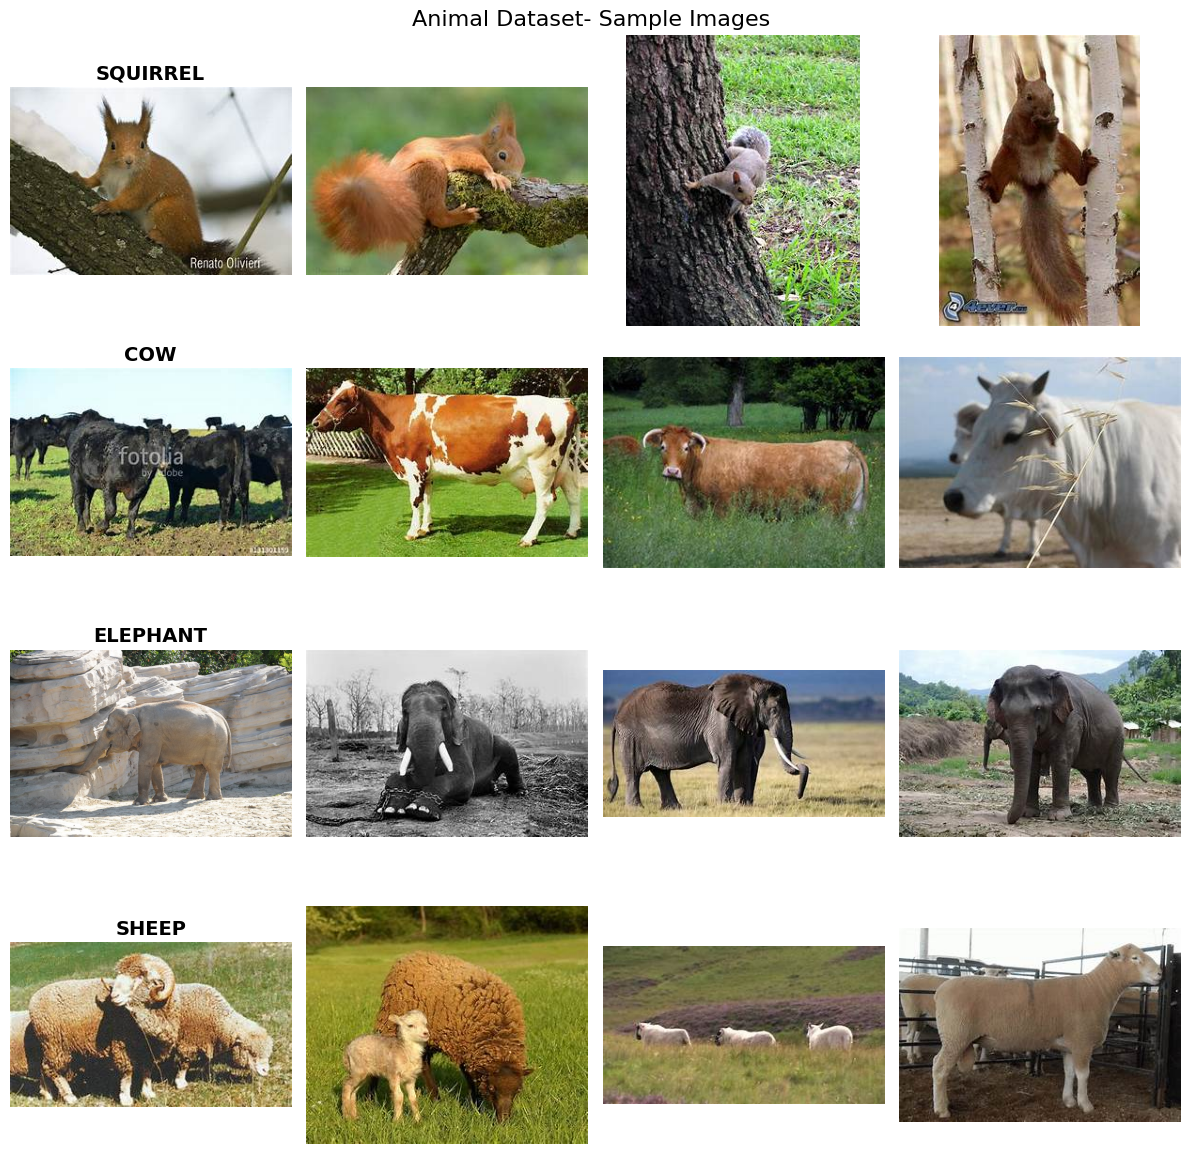

✅ These are Samples of Animal_Images 


In [ ]:
import random

clean_dir = '/content/clean_animals'
categories = os.listdir(clean_dir)
print(f"categories : {categories}")
fig , axes = plt.subplots(4 , 4 , figsize=(12 , 12 ))
for i , category in enumerate(categories):
  category_path = os.path.join(clean_dir, category)
  image_files = os.listdir(category_path)

  for j in range(4):
        ax = axes[i, j]
        random_image = random.choice(image_files)
        img_path = os.path.join(category_path, random_image)

        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('off')
        if j == 0:
            ax.set_title(category.upper(), fontsize=14, fontweight='bold')

plt.suptitle('Animal Dataset- Sample Images ', fontsize=16)
plt.tight_layout()
plt.show()

print("✅ These are Samples of Animal_Images ")

In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator (
    rescale = 1./225,
    rotation_range = 20,
    width_shift_range= 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2 ,
    zoom_range = 0.2,
    horizontal_flip = True,
   fill_mode = 'nearest',
   validation_split = 0.2
)

val_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

train_generator = train_datagen.flow_from_directory(
    clean_dir ,
    target_size = (IMG_SIZE , IMG_SIZE ),
    batch_size = BATCH_SIZE ,
    class_mode = "categorical" ,
    subset = "training",
    shuffle = True
)

validation_generator = val_datagen.flow_from_directory(
    clean_dir,
    target_size = (IMG_SIZE , IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "categorical",
    subset = 'validation',
    shuffle = False
)

print("Data Generators Created")


Found 5596 images belonging to 4 classes.
Found 1398 images belonging to 4 classes.
Data Generators Created


In [ ]:
base_model = MobileNetV2(
    input_shape = (IMG_SIZE , IMG_SIZE , 3),
    include_top = False ,
    weights = "imagenet"
)

base_model.trainable = False

model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(4 , activation = "softmax")
])

model.summary()
print("MOdel Built Wirh Transfer Learning")

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

MOdel Built Wirh Transfer Learning


In [ ]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate =0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

history= model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator,
    verbose = 1
)

print("Training_Comlete")



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.7968 - loss: 0.5464 - val_accuracy: 0.9428 - val_loss: 0.1572
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 330s 2s/step - accuracy: 0.9266 - loss: 0.2007 - val_accuracy: 0.9521 - val_loss: 0.1430
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 335s 2s/step - accuracy: 0.9310 - loss: 0.1891 - val_accuracy: 0.9528 - val_loss: 0.1361
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 347s 2s/step - accuracy: 0.9355 - loss: 0.1754 - val_accuracy: 0.9435 - val_loss: 0.1643
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 335s 2s/step - accuracy: 0.9362 - loss: 0.1703 - val_accuracy: 0.9542 - val_loss: 0.1415
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - accuracy: 0.9390 - loss: 0.1600 - val_accuracy: 0.9535 - val_loss: 0.1487
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 361s 2s/step - accuracy: 0.9441 - loss: 0.1556 - val_accuracy: 0.9499 - val_loss: 0.1693
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.9532 - loss: 0.1417 - val_accu

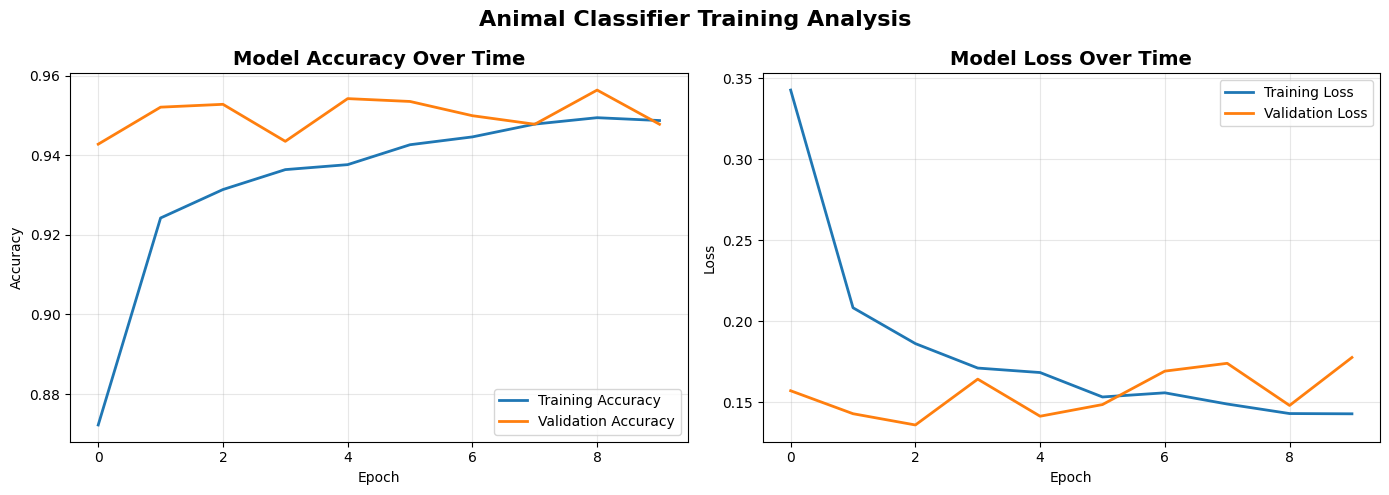

✅ Training curves visualized!


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_title('Model Accuracy Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss
axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_title('Model Loss Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.suptitle('Animal Classifier Training Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ Training curves visualized!")